# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [9]:
import pandas as pd


# Step 1: Verify column names before renaming to avoid errors
print("Original columns:", df.columns)

# Rename columns only if they exist in the DataFrame
columns_to_rename = {
    'GRADES_PK_G': 'ENROLL_PREK',
    'GRADES_KG_G': 'ENROLL_KINDER'
}

# Filtering to rename only existing columns
df.rename(columns={k: v for k, v in columns_to_rename.items() if k in df.columns}, inplace=True)

# Step 2: Handle missing data correctly
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include='number').columns
non_numeric_cols = df.select_dtypes(exclude='number').columns

# Fill missing values for numeric columns with the mean
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill missing values for non-numeric columns (if needed)
# For example, we can fill missing non-numeric values with empty strings
df[non_numeric_cols] = df[non_numeric_cols].fillna('')

# Check the DataFrame after renaming and filling missing values
print(df.head())


Original columns: Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')
       PRIMARY_KEY       STATE  YEAR         ENROLL  TOTAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992  917541.566176      2678885.0   
1      1992_ALASKA      ALASKA  1992  917541.566176      1049591.0   
2     1992_ARIZONA     ARIZONA  1992  917541.566176      3258079.0   
3    1992_ARKANSAS    ARKANSAS  1992  917541.566176      1711959.0   
4  1992_CALIFORNIA  CALIFORNIA  1992  917541.566176     26260025.0   

   FEDERAL_REVENUE  STATE_REV

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [10]:
years_logged = df['YEAR'].nunique()
print(f"There are {years_logged} years of data logged in the dataset.")


There are 33 years of data logged in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [11]:
# Filter data for Michigan and Ohio
michigan_data = df[df['STATE'] == 'MICHIGAN']
ohio_data = df[df['STATE'] == 'OHIO']

# Calculate average scores for the chosen test
michigan_avg = michigan_data['AVG_MATH_8_SCORE'].mean()
ohio_avg = ohio_data['AVG_MATH_8_SCORE'].mean()

if michigan_avg > ohio_avg:
    print("Michigan has a higher average for Grade 8 Math.")
else:
    print("Ohio has a higher average for Grade 8 Math.")


Ohio has a higher average for Grade 8 Math.


Find the average for your chosen test across all states in 2019

In [12]:
avg_2019 = df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()
print(f"The average Grade 8 Math score across all states in 2019 is {avg_2019:.2f}.")


The average Grade 8 Math score across all states in 2019 is 281.26.


For each state, find a maximum value for your chosen test score

In [13]:
chosen_test_score = 'AVG_MATH_4_SCORE'
if chosen_test_score in df.columns:
    # Group by 'STATE' and find the maximum value for the chosen test score
    max_test_scores = df.groupby('STATE')[chosen_test_score].max()

    # Display the results
    print(max_test_scores)
else:
    print(f"Column '{chosen_test_score}' does not exist in the DataFrame.")

STATE
ALABAMA                 236.327434
ALASKA                  237.000000
ARIZONA                 240.000000
ARKANSAS                240.000000
CALIFORNIA              236.327434
COLORADO                247.000000
CONNECTICUT             245.000000
DELAWARE                243.000000
DISTRICT_OF_COLUMBIA    236.327434
DODEA                   250.000000
FLORIDA                 246.000000
GEORGIA                 240.000000
HAWAII                  243.000000
IDAHO                   242.000000
ILLINOIS                239.000000
INDIANA                 249.000000
IOWA                    246.000000
KANSAS                  248.000000
KENTUCKY                242.000000
LOUISIANA               236.327434
MAINE                   246.000000
MARYLAND                247.000000
MASSACHUSETTS           253.000000
MICHIGAN                238.000000
MINNESOTA               253.000000
MISSISSIPPI             241.000000
MISSOURI                241.000000
MONTANA                 244.000000
NATIONAL      

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [17]:
# Create new features

# Expenditure per student
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

# Revenue per student
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']

# Federal/State/Local revenue proportions
df['FEDERAL_REVENUE_PROP'] = df['FEDERAL_REVENUE'] / df['TOTAL_REVENUE']
df['STATE_REVENUE_PROP'] = df['STATE_REVENUE'] / df['TOTAL_REVENUE']
df['LOCAL_REVENUE_PROP'] = df['LOCAL_REVENUE'] / df['TOTAL_REVENUE']

# Instruction and Support Services expenditure proportions
df['INSTRUCTION_EXPENDITURE_PROP'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df['SUPPORT_SERVICES_EXPENDITURE_PROP'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['TOTAL_EXPENDITURE']

# Display the first few rows of the modified dataframe
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,STATE_REVENUE_RATIO,LOCAL_REVENUE_RATIO,INSTRUCTION_SUPPORT_RATIO,LOG_TOTAL_REVENUE,LOG_TOTAL_EXPENDITURE,FEDERAL_REVENUE_PROP,STATE_REVENUE_PROP,LOCAL_REVENUE_PROP,INSTRUCTION_EXPENDITURE_PROP,SUPPORT_SERVICES_EXPENDITURE_PROP
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,0.619298,0.267156,2.015824,14.800912,14.791503,0.113546,0.619298,0.267156,0.558333,0.276975
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,0.686659,0.211606,1.420231,13.863912,13.787614,0.101735,0.686659,0.211606,0.512461,0.360829
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,0.420436,0.488133,1.424891,14.996649,15.039751,0.091431,0.420436,0.488133,0.422130,0.296254
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,0.560051,0.335641,1.994513,14.353149,14.371132,0.104308,0.560051,0.335641,0.553248,0.277385
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,0.630103,0.290976,1.685136,17.083558,17.116476,0.078921,0.630103,0.290976,0.529091,0.313975


Feature engineering justification: **I introduced these feature engineering changes to create more meaningful predictors that normalize the financial data and better reflect the relationships between funding, expenditures, and student performance. By calculating expenditure and revenue per student, I transformed raw financial data into per-student metrics, which offer a clearer perspective on the resources allocated to each student, independent of state size or total enrollment. I also created proportions for federal, state, and local revenue to capture the balance of funding sources and assess their potential impact on performance. Additionally, I calculated the proportion of total expenditures spent on instruction and support services, which are key areas directly related to academic outcomes. These modifications help standardize the data and provide insights into how resource allocation affects student performance.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

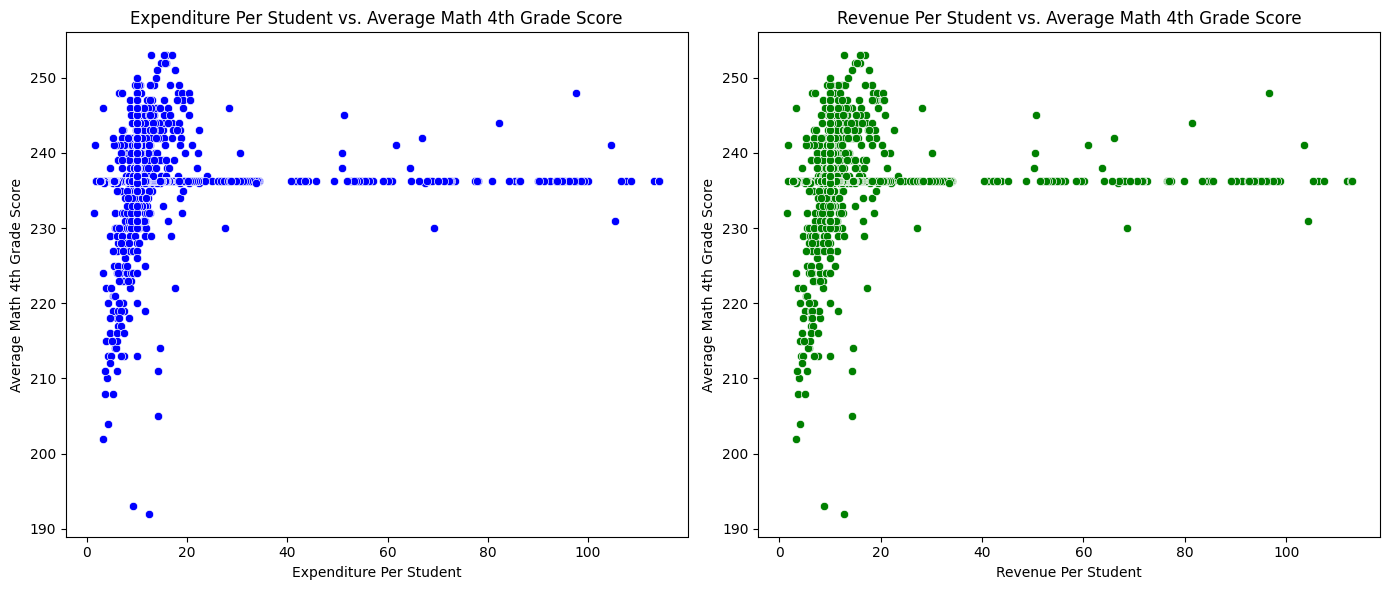

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(14, 6))

# Scatter plot for EXPENDITURE_PER_STUDENT vs. AVG_MATH_4_SCORE
plt.subplot(1, 2, 1)
sns.scatterplot(x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', data=df, color='blue')
plt.title('Expenditure Per Student vs. Average Math 4th Grade Score')
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Math 4th Grade Score')

# Scatter plot for REVENUE_PER_STUDENT vs. AVG_MATH_4_SCORE
plt.subplot(1, 2, 2)
sns.scatterplot(x='REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE', data=df, color='green')
plt.title('Revenue Per Student vs. Average Math 4th Grade Score')
plt.xlabel('Revenue Per Student')
plt.ylabel('Average Math 4th Grade Score')

# Show the plots
plt.tight_layout()
plt.show()


**Expenditure and Revenue Per Student vs. Average Math 4th Grade Score**

**Visualization 2**

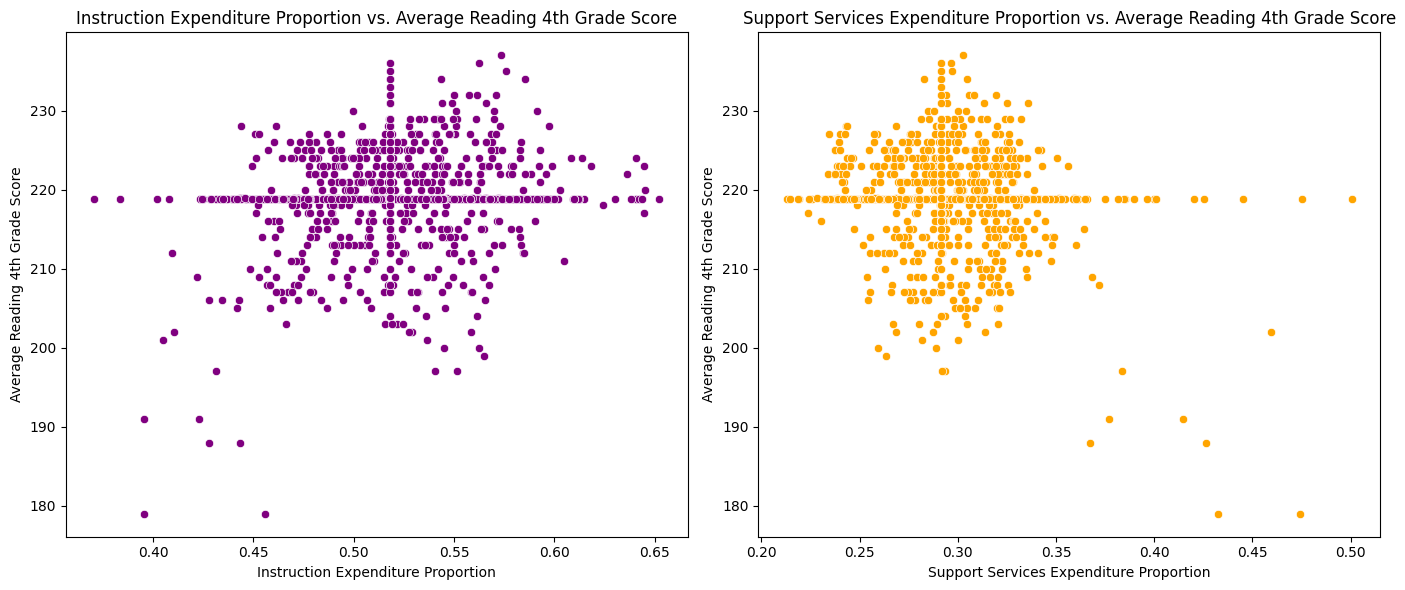

In [21]:
# Set up the plotting environment
plt.figure(figsize=(14, 6))

# Scatter plot for INSTRUCTION_EXPENDITURE_PROP vs. AVG_READING_4_SCORE
plt.subplot(1, 2, 1)
sns.scatterplot(x='INSTRUCTION_EXPENDITURE_PROP', y='AVG_READING_4_SCORE', data=df, color='purple')
plt.title('Instruction Expenditure Proportion vs. Average Reading 4th Grade Score')
plt.xlabel('Instruction Expenditure Proportion')
plt.ylabel('Average Reading 4th Grade Score')

# Scatter plot for SUPPORT_SERVICES_EXPENDITURE_PROP vs. AVG_READING_4_SCORE
plt.subplot(1, 2, 2)
sns.scatterplot(x='SUPPORT_SERVICES_EXPENDITURE_PROP', y='AVG_READING_4_SCORE', data=df, color='orange')
plt.title('Support Services Expenditure Proportion vs. Average Reading 4th Grade Score')
plt.xlabel('Support Services Expenditure Proportion')
plt.ylabel('Average Reading 4th Grade Score')

# Show the plots
plt.tight_layout()
plt.show()


**Expenditure Proportions vs. Average Reading 4th Grade Score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df[['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT', 
        'INSTRUCTION_EXPENDITURE_PROP', 'SUPPORT_SERVICES_EXPENDITURE_PROP']]
y = df['AVG_MATH_4_SCORE']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1372, 4), (343, 4), (1372,), (343,))

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [31]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [32]:
# create your model here
model = LinearRegression()


In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict values
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Absolute Error: 2.599899481806739
Root Mean Squared Error: 4.806048603532956
R-squared: -0.05160442611385596


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

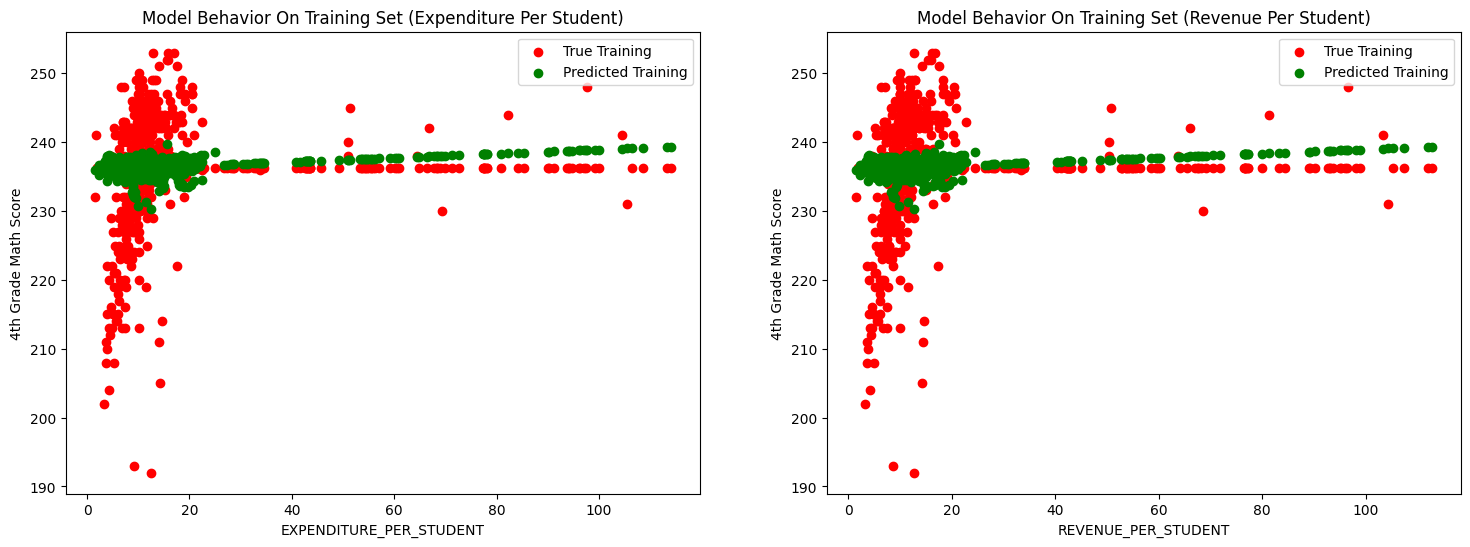

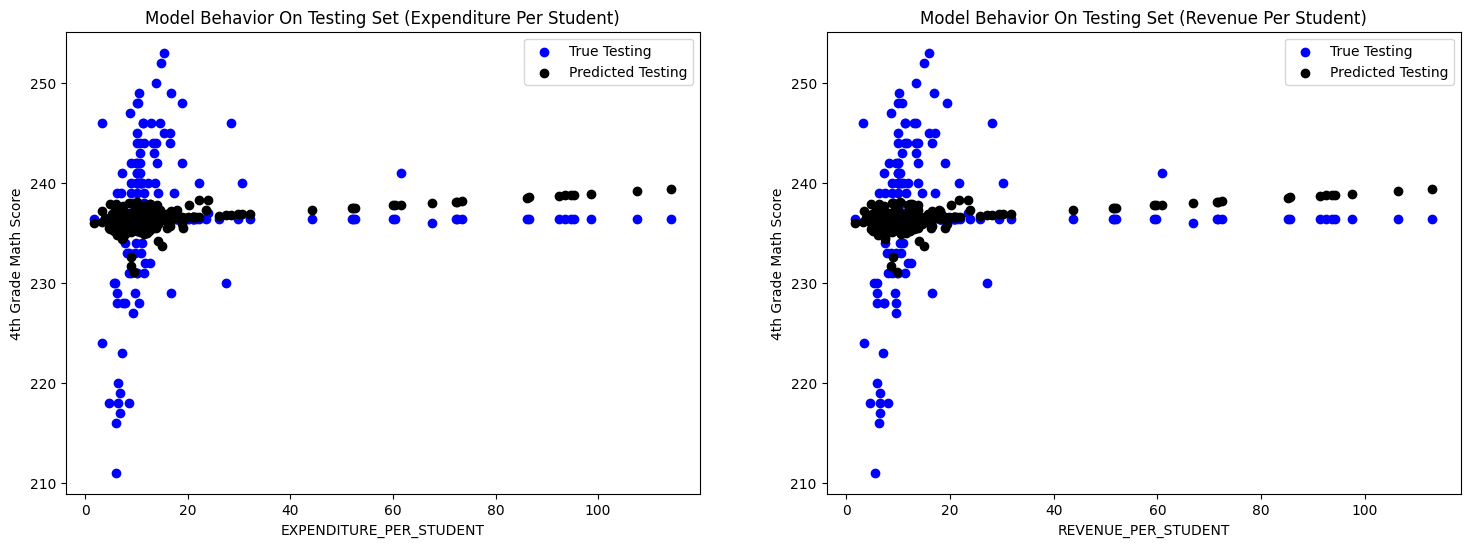

In [38]:
# Predictor 1: EXPENDITURE_PER_STUDENT
col_name1 = 'EXPENDITURE_PER_STUDENT'

# Predictor 2: REVENUE_PER_STUDENT
col_name2 = 'REVENUE_PER_STUDENT'

# Visualizing model behavior on training set for both predictors
fig, axs = plt.subplots(1, 2, figsize=(18,6))

# Plot for first predictor (EXPENDITURE_PER_STUDENT)
axs[0].scatter(X_train[col_name1], y_train, color="red")
axs[0].scatter(X_train[col_name1], model.predict(X_train), color="green")
axs[0].legend(['True Training', 'Predicted Training'])
axs[0].set_xlabel(col_name1)
axs[0].set_ylabel('4th Grade Math Score')  # Adjust label based on predictor
axs[0].set_title("Model Behavior On Training Set (Expenditure Per Student)")

# Plot for second predictor (REVENUE_PER_STUDENT)
axs[1].scatter(X_train[col_name2], y_train, color="red")
axs[1].scatter(X_train[col_name2], model.predict(X_train), color="green")
axs[1].legend(['True Training', 'Predicted Training'])
axs[1].set_xlabel(col_name2)
axs[1].set_ylabel('4th Grade Math Score')  # Adjust label based on predictor
axs[1].set_title("Model Behavior On Training Set (Revenue Per Student)")

plt.show()

# Visualizing model behavior on testing set for both predictors
fig, axs = plt.subplots(1, 2, figsize=(18,6))

# Plot for first predictor (EXPENDITURE_PER_STUDENT)
axs[0].scatter(X_test[col_name1], y_test, color="blue")
axs[0].scatter(X_test[col_name1], model.predict(X_test), color="black")
axs[0].legend(['True Testing', 'Predicted Testing'])
axs[0].set_xlabel(col_name1)
axs[0].set_ylabel('4th Grade Math Score')  # Adjust label based on predictor
axs[0].set_title("Model Behavior On Testing Set (Expenditure Per Student)")

# Plot for second predictor (REVENUE_PER_STUDENT)
axs[1].scatter(X_test[col_name2], y_test, color="blue")
axs[1].scatter(X_test[col_name2], model.predict(X_test), color="black")
axs[1].legend(['True Testing', 'Predicted Testing'])
axs[1].set_xlabel(col_name2)
axs[1].set_ylabel('4th Grade Math Score')  # Adjust label based on predictor
axs[1].set_title("Model Behavior On Testing Set (Revenue Per Student)")

plt.show()
